<a href="https://colab.research.google.com/github/ohvictor/ASSD-2020-G4/blob/master/PI_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1

In [ ]:
s = 1.5   #mm
a = s*s   #mm^2
d = 15e4  #u/mm^2
conos = a*d #u
cono = 1/d  #mm^2
lado_cono = np.sqrt(cono)

In [ ]:
size_min_retina = lado_cono
dist_retina = 17  #mm
dist_lcd = 300  #mm
size_min_lcd = size_min_retina/dist_retina*dist_lcd
print("{:e}".format(size_min_lcd) + " mm")

4.556451e-02 mm


# Ejercicio 2

In [ ]:
f = 35    #mm
area = 10*10 #mm^2
res = 1e6 #pix
dist = 1000  #mm

In [ ]:
size_pix = area/res #mm2
side_pix = np.sqrt(size_pix)  #mm
size_img = size_pix/f*dist    #mm
print("{:e}".format(size_img) + " mm")

2.857143e-03 mm


#Ejercicio 3

Samsung Galaxy S9+:

https://www.samsung.com/sg/support/mobile-devices/everything-you-need-to-know-about-your-samsung-galaxy-s9-and-s9-plus-camera/
- Resolution: 12 Mpi
- Pixel size: 14 um
- Sensor size: 1/2.55''


In [ ]:
dist3 = 500 #mm


# Ejercicio 4

In [ ]:
import numpy as np
from PIL import Image, ImageShow

def repeat(img_data, size_new):
  size_old = np.array(img_data.shape)
  k_row, k_col =  size_new/size_old
  #ii = (np.floor((np.arange(size_new[0]))*k_row)).astype(int)
  #jj = (np.floor((np.arange(size_new[1]))*k_col)).astype(int)
  
  #img_new = img_data[ii,:][:,jj]
  return np.repeat(np.repeat(img_data,k_col, axis=1),k_row, axis=0)

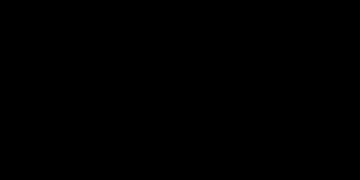

In [ ]:
from PIL import Image, ImageShow
img_size = (360, 180)
im = Image.new("L",img_size)
display(im)

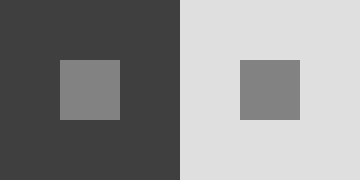

In [ ]:
b = 63
g = 130
w = 223
new_size = [180, 360]
data1 = np.array([[b,b,b,w,w,w],[b,g,b,w,g,w],[b,b,b,w,w,w]],np.uint8)
data3 = repeat(data1, new_size)
data3.shape
display(Image.fromarray(data3))

# Ejercicio 5

In [2]:
def decimate(img_data, kernel_size, pixel_pick):
  return img_data[pixel_pick[0]::kernel_size[0],pixel_pick[1]::kernel_size[1]]

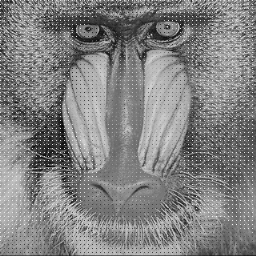

array([[227,  57,  87, ...,  90, 116, 128],
       [114,  83,  71, ..., 117,  86,  64],
       [ 77, 112,  78, ..., 102,  66, 139],
       ...,
       [102, 135, 143, ...,  95,  96,  88],
       [138, 140, 124, ...,  90,  87,  83],
       [ 82,  68,  57, ...,  41,  41,  37]], dtype=uint8)

In [4]:
import numpy as np
from PIL import Image, ImageShow
mono = Image.open("mono.bmp")
mono.size
mono_data = np.asarray(mono)
display(mono)
display(mono_data)

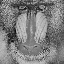

In [5]:
mono_22 = decimate(mono_data,[4,4],[2,2])

display(Image.fromarray(mono_22))

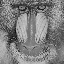

In [6]:
mono_11 = decimate(mono_data,[4,4],[1,1])

display(Image.fromarray(mono_11))

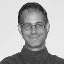

In [7]:
mono_00 = decimate(mono_data,[4,4],[0,0])

display(Image.fromarray(mono_00))

In [95]:
def decimate_mean(img_data, kernel_size):
  h,w = img_data.shape
  kernel_h, kernel_w = kernel_size
  ans = np.array([], np.uint8)
  for i in range(0,h,kernel_h):
    for j in range(0,w,kernel_w):
      calc = np.uint8(img_data[i:i+kernel_h,j:j+kernel_w].mean())
      ans = np.append(ans,calc)
  
  return ans.reshape(int(h/kernel_h),int(w/kernel_w))

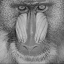

In [96]:
mono_mean = decimate_mean(mono_data, [4,4])
display(Image.fromarray(mono_mean))

# Interpolación

In [9]:
import numpy as np
from PIL import Image, ImageShow

def nearest_neighbor(img, size_new):
  size_old = np.array(img.size)
  k_row, k_col =  size_old / size_new
  ii = (np.ceil((np.arange(size_new[0])+1)*k_row)-1).astype(int)
  jj = (np.ceil((np.arange(size_new[1])+1)*k_col)-1).astype(int)

  img_new = np.asarray(img)[:,ii][jj,:]
  return img_new

In [21]:
def formula_linear(x0, y0, x1, y1, x):
  return y0*(x1-x)/(x1-x0)+y1*(x-x0)/(x1-x0)

In [28]:
def interpolation_linear(a, size):
  scale = a.size/size
  retval = np.zeros(size)  # Arreglo a rellenar
  pad = np.append(a[:],a[-1])
  for i,f in enumerate(retval):
    x = i*scale
    x1 = int(np.floor(x))
    x2 = int(np.ceil(x))
    y1, y2 = pad[x1], pad[x2]
    if(x1 == x2):
      retval[i] = y1
    else:
      retval[i] = formula_linear(x1,y1,x2,y2,x)
  return retval


In [90]:
def interpolation_bilinear(img_data, size):
  old_size = np.array(img_data.shape)
  k_row, k_col = old_size/size

  img_int = np.array([])
  for row in img_data:
    new_row = interpolation_linear(row, size[1])
    img_int = np.append(img_int, new_row)

  img_int = img_int.flatten()
  img_int = img_int.reshape((old_size[0], size[1]))
  img_int = img_int.transpose()

  img_fin = np.array([])
  for row in img_int:
    new_row = interpolation_linear(row, size[0])
    img_fin = np.append(img_fin, new_row)

  img_fin = img_fin.flatten()
  img_fin = img_fin.reshape(tuple(size))
  img_fin = img_fin.transpose()

  return img_fin.astype(np.uint8)

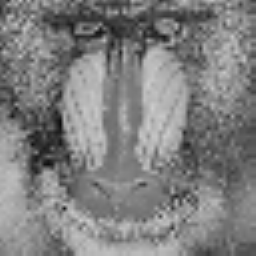

In [91]:
mono_22_bil = interpolation_bilinear(mono_22, [256,256])
display(Image.fromarray(mono_22_bil))

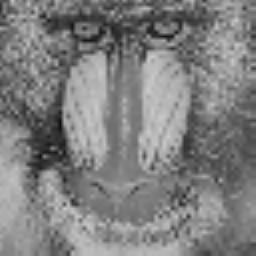

In [92]:
mono_11_bil = interpolation_bilinear(mono_11, [256,256])
display(Image.fromarray(mono_11_bil))

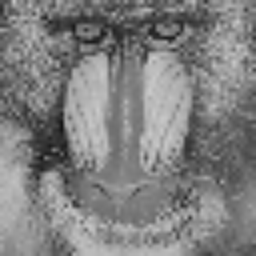

In [93]:
image_11 = Image.fromarray(mono_11)
image_11 = image_11.resize((256,256), resample=Image.BILINEAR)
display(image_11)

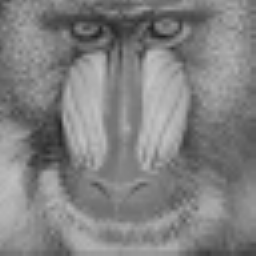

In [97]:
mono_mean_bil = interpolation_bilinear(mono_mean, [256,256])
display(Image.fromarray(mono_mean_bil))

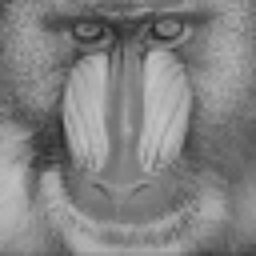

In [98]:
image_mean = Image.fromarray(mono_mean)
image_mean = image_mean.resize((256,256), resample=Image.BILINEAR)
display(image_mean)

In [139]:
def formula_cubic(p, x):
  """ Para x entre 0 y 1, se puede interpolar los valores en x con los valores pi
  Input:
  p - arreglo de valores [p0,p1,p2,p3]
  x - coordenada x
  Output:
  Valor interpolado en x
  """
  p0,p1,p2,p3 = p
  x3,x2 = x**3, x**2
  return (-0.5*p0+1.5*p1-1.5*p2+0.5*p3)*x3+(p0-2.5*p1+2*p2-0.5*p3)*x2+(-0.5*p0+0.5*p2)*x+p1

In [136]:
def interpolation_cubic(a, size):
  scale = a.size/size
  retval = np.zeros(size)

  a = np.append(a[0],a)
  a = np.append(a,a[-1])
  a = np.append(a,a[-1])

  for i,f in enumerate(retval):
    x = i*scale+1
    x0 = int(np.floor(x))-1
    x1 = int(np.floor(x))
    x2 = int(np.ceil(x))
    x3 = int(np.ceil(x)) +1

    p = [a[x0], a[x1], a[x2], a[x3]]

    if (x1 == x2):
      retval[i] = p[1]
    else:
      retval[i] = formula_cubic(p,x-np.floor(x))

  return retval

In [122]:
def interpolation_bicubic(img_data, size):
  old_size = np.array(img_data.shape)
  k_row, k_col = old_size/size

  img_int = np.array([])
  for row in img_data:
    new_row = interpolation_cubic(row, size[1])
    img_int = np.append(img_int, new_row)

  img_int = img_int.flatten()
  img_int = img_int.reshape((old_size[0], size[1]))
  img_int = img_int.transpose()

  img_fin = np.array([])
  for row in img_int:
    new_row = interpolation_cubic(row, size[0])
    img_fin = np.append(img_fin, new_row)

  img_fin = img_fin.flatten()
  img_fin = img_fin.reshape(tuple(size))
  img_fin = img_fin.transpose()

  return img_fin.astype(np.uint8)

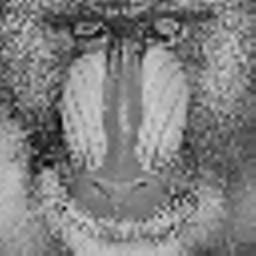

In [137]:
mono_22_bic = interpolation_bicubic(mono_22, [256,256])
display(Image.fromarray(mono_22_bic))

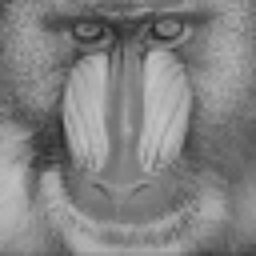

In [130]:
image_22_c = Image.fromarray(mono_22)
image_22_c = image_mean.resize((256,256), resample=Image.BICUBIC)
display(image_22_c)

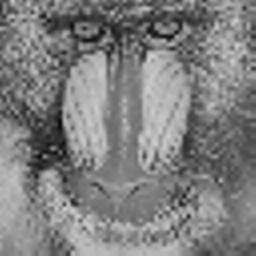

In [128]:
mono_11_bic = interpolation_bicubic(mono_11, [256,256])
display(Image.fromarray(mono_11_bic))

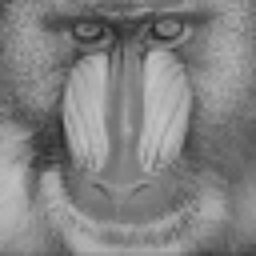

In [131]:
image_11_c = Image.fromarray(mono_11)
image_11_c = image_mean.resize((256,256), resample=Image.BICUBIC)
display(image_11_c)

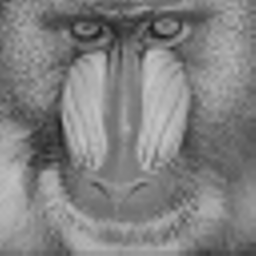

In [129]:
mono_mean_bic = interpolation_bicubic(mono_mean, [256,256])
display(Image.fromarray(mono_mean_bic))

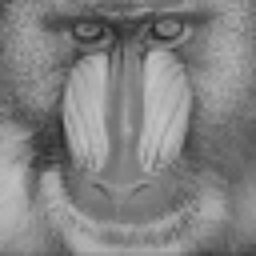

In [132]:
image_mean_c = Image.fromarray(mono_mean)
image_mean_c = image_mean.resize((256,256), resample=Image.BICUBIC)
display(image_mean_c)

#FFT2

In [149]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageShow
from matplotlib.colors import LogNorm

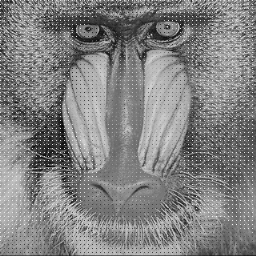

In [147]:
mono = Image.open("mono.bmp")
mono.size
mono_data = np.asarray(mono)
display(mono)

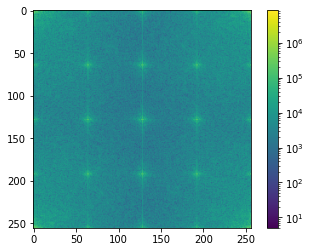

In [153]:
mono_fft = np.fft.fft2(mono_data)
abs = np.abs(mono_fft)
plt.imshow(abs, norm=LogNorm(vmin=5))
plt.colorbar()